In [1]:
import pandas as pd
import numpy as np 

In [250]:
df = pd.read_csv(r'C:\Users\Cars24\Desktop\python\Algerian_Forest_Fire_Project\Algerian_forest_fires_dataset.csv')

In [251]:
# Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
# Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
# RH : Relative Humidity in %: 21 to 90
# Ws :Wind speed in km/h: 6 to 29
# Rain: total day in mm: 0 to 16.8 FWI Components
# Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
# Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
# Drought Code (DC) index from the FWI system: 7 to 220.4
# Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
# Buildup Index (BUI) index from the FWI system: 1.1 to 68
# Fire Weather Index (FWI) Index: 0 to 31.1
# # Classes: two classes, namely Fire and not Fire

In [252]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [254]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [255]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [256]:
df.loc[:122,'Region']=0
df.loc[123:,'Region']=1
df.loc[122:123]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [257]:
df = df.drop([122,123]).reset_index(drop=True)

In [258]:
df = df.dropna().reset_index(drop=True)
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [259]:
df.columns = df.columns.str.strip()
df.head()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [260]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

In [261]:
df['Classes'].str.strip().unique()
df['Classes_New']=df['Classes'].apply(lambda x : x.strip())
df = df.drop(['Classes'],axis=1)


In [262]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_New
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0.0,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0.0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0.0,not fire


In [263]:
df_copy=df.drop(['day','month','year'],axis=True)

In [264]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_New
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0.0,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0.0,not fire
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0.0,not fire


In [265]:
# Lets Change the Column name First 
new_column_names = {'RH':'Humidity','Ws':'Wind_Speed','FFMC':'Fuel_Moisture_Code','DMC':'Duff_Moisture_Code','DC':'Drought_Code','ISI':'Initial_Spread_Index','BUI':'Buildup_Index','FWI':'Fire_Weather_Index'}

df_copy=df_copy.rename(columns=new_column_names)
df_copy.head()

,Temperature,Humidity,Wind_Speed,Rain,Fuel_Moisture_Code,Duff_Moisture_Code,Drought_Code,Initial_Spread_Index,Buildup_Index,Fire_Weather_Index,Region,Classes_New
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0.0,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0.0,not fire
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0.0,not fire


In [266]:
df_copy[df_copy.isna().any(axis=1)]

,Temperature,Humidity,Wind_Speed,Rain,Fuel_Moisture_Code,Duff_Moisture_Code,Drought_Code,Initial_Spread_Index,Buildup_Index,Fire_Weather_Index,Region,Classes_New


In [267]:
df_copy=df_copy.drop(122).reset_index(drop=True)

In [268]:
df_copy.columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Rain', 'Fuel_Moisture_Code',
       'Duff_Moisture_Code', 'Drought_Code', 'Initial_Spread_Index',
       'Buildup_Index', 'Fire_Weather_Index', 'Region', 'Classes_New'],
      dtype='object')

In [269]:
df_copy[['Temperature', 'Humidity', 'Wind_Speed']]=df_copy[['Temperature', 'Humidity', 'Wind_Speed']].astype(int)


In [270]:
df_copy.columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Rain', 'Fuel_Moisture_Code',
       'Duff_Moisture_Code', 'Drought_Code', 'Initial_Spread_Index',
       'Buildup_Index', 'Fire_Weather_Index', 'Region', 'Classes_New'],
      dtype='object')

In [271]:
float_columns =  ['Rain', 'Fuel_Moisture_Code',
       'Duff_Moisture_Code', 'Drought_Code', 'Initial_Spread_Index',
       'Buildup_Index', 'Fire_Weather_Index']
df_copy[float_columns] =df_copy[float_columns].astype(float)

In [272]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           243 non-null    int32  
 1   Humidity              243 non-null    int32  
 2   Wind_Speed            243 non-null    int32  
 3   Rain                  243 non-null    float64
 4   Fuel_Moisture_Code    243 non-null    float64
 5   Duff_Moisture_Code    243 non-null    float64
 6   Drought_Code          243 non-null    float64
 7   Initial_Spread_Index  243 non-null    float64
 8   Buildup_Index         243 non-null    float64
 9   Fire_Weather_Index    243 non-null    float64
 10  Region                243 non-null    float64
 11  Classes_New           243 non-null    object 
dtypes: float64(8), int32(3), object(1)
memory usage: 20.1+ KB


In [273]:
df_copy.head()

,Temperature,Humidity,Wind_Speed,Rain,Fuel_Moisture_Code,Duff_Moisture_Code,Drought_Code,Initial_Spread_Index,Buildup_Index,Fire_Weather_Index,Region,Classes_New
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,not fire


In [274]:
df_copy['Classes_New'].unique()

array(['not fire', 'fire'], dtype=object)

In [275]:
df_copy['classes']=np.where(df_copy['Classes_New']=='fire',1,0)
df_copy=df_copy.drop('Classes_New',axis=1)
df_copy

,Temperature,Humidity,Wind_Speed,Rain,Fuel_Moisture_Code,Duff_Moisture_Code,Drought_Code,Initial_Spread_Index,Buildup_Index,Fire_Weather_Index,Region,classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1.0,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1.0,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1.0,0


In [276]:
df_copy['classes'].unique()

array([0, 1])

In [277]:
df_copy.to_csv('Algeria_cleaned_data.csv')

In [278]:
df = pd.read_csv('Algeria_cleaned_data.csv')
df = df.iloc[:,1:]
X = df.drop('Fire_Weather_Index',axis=1)
y=df['Fire_Weather_Index']

In [279]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [280]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

<Axes: >

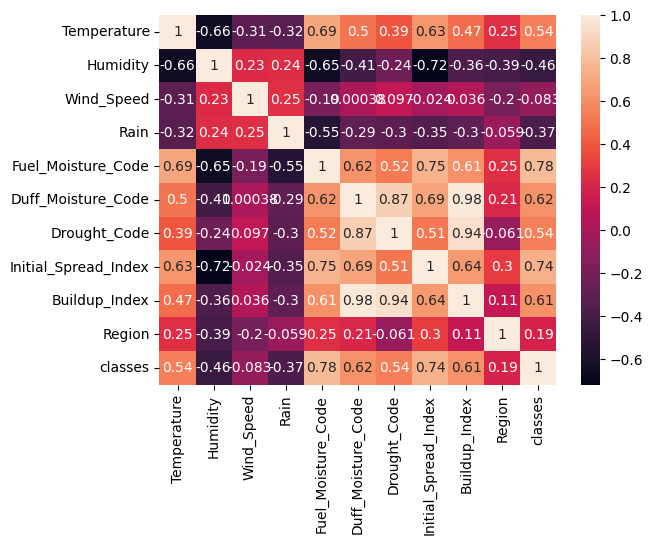

In [282]:
import seaborn as sns
sns.heatmap(x_train.corr(),annot=True)

In [296]:
def correlation(dataset,threshold):
    corr_matrix=dataset.corr()
    cor_cols=set()
    for i in range(len(x_train.corr().columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                cor_cols.add(colname)
    return cor_cols

In [301]:
cor_cols=correlation(x_train,0.85)

In [302]:
x_train.drop(cor_cols,axis=1,inplace=True)
x_test.drop(cor_cols,axis=1,inplace=True)
x_train.shape,x_test.shape

((182, 9), (61, 9))

In [303]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [305]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -0.98907071, -1.10431526],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
         1.01105006, -1.10431526],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         1.01105006,  0.90553851],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -0.98907071, -1.10431526],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         1.01105006,  0.90553851],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -0.98907071, -1.10431526]])

C:\Users\Cars24\AppData\Local\Temp\ipykernel_15860\3011642765.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


<Axes: >

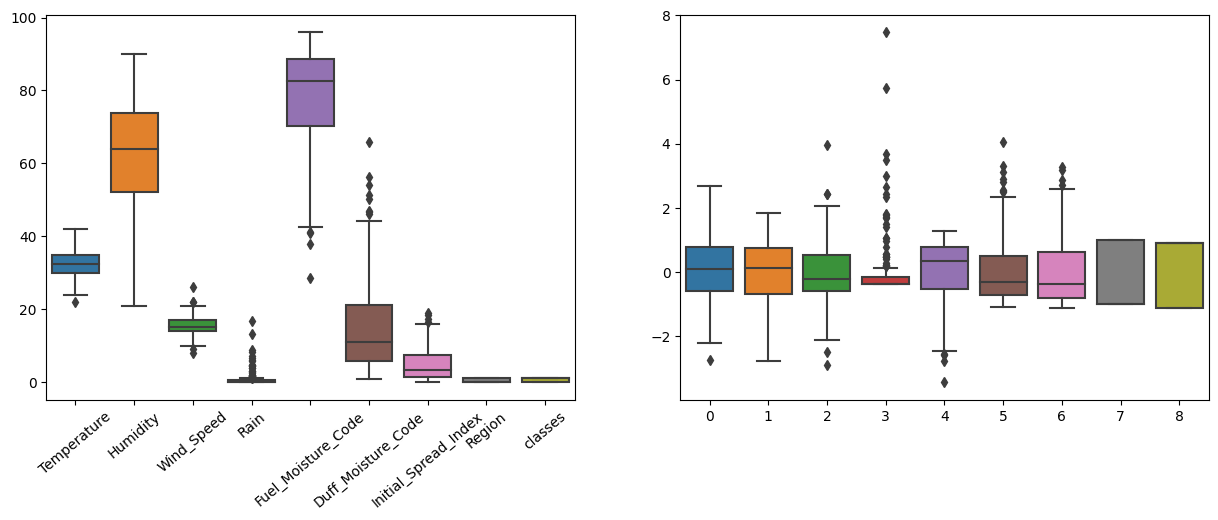

In [325]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.xticks(rotation = 40)
sns.boxplot(data=x_train)
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)

Linear Regrassion 

In [327]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
lr = LinearRegression()
lr_model = lr.fit(x_train_scaled,y_train)
lr_pred=lr.predict(x_test_scaled)
print("MAE :" , mean_absolute_error(y_test,lr_pred))
print("r2_score :" , r2_score(y_test,lr_pred))

MAE : 0.5468236465249976
r2_score : 0.9847657384266951


Lasso Regression

In [330]:
from sklearn.linear_model import Lasso
lasso =Lasso() 
lasso_model = lasso.fit(x_train_scaled,y_train)
lasso_pred = lasso_model.predict(x_test_scaled)
print("MAE :" , mean_absolute_error(y_test,lasso_pred))
print("r2_score :" , r2_score(y_test,lasso_pred))

MAE : 1.133175994914409
r2_score : 0.9492020263112388


In [331]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge_model=ridge.fit(x_train_scaled,y_train)
ridge_pred=ridge_model.predict(x_test_scaled)
print("MAE :" , mean_absolute_error(y_test,ridge_pred))
print("r2_score :" , r2_score(y_test,ridge_pred))

MAE : 0.5642305340105704
r2_score : 0.9842993364555513


In [332]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic_model=elastic.fit(x_train_scaled,y_train)
elastic_pred=elastic_model.predict(x_test_scaled)
print("MAE :" , mean_absolute_error(y_test,elastic_pred))
print("r2_score :" , r2_score(y_test,elastic_pred))

MAE : 1.8822353634896
r2_score : 0.8753460589519703
